<a href="https://colab.research.google.com/github/ucfilho/ANN_capstone_projects/blob/master/ANN_Jeniffer_dez_04_2018.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# bibliotecas usadas
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score 

In [0]:
# para gerar o grafico no browser
%matplotlib inline

In [3]:
# local dos dados e modifica o diretorio
!git clone https://github.com/Jeniffer2018/Redes-Neurais
% cd Redes-Neurais
! ls

Cloning into 'Redes-Neurais'...
remote: Enumerating objects: 10, done.
remote: Counting objects: 100% (10/10), done.
remote: Compressing objects: 100% (10/10), done.
remote: Total 63 (delta 3), reused 0 (delta 0), pack-reused 53
Unpacking objects: 100% (63/63), done.
/content/Redes-Neurais
 Dados1.csv	   Dados_teste1.txt   Sim5Des1_568_preto_original2_red1.jpg
 dados.csv	   Dados_train1.txt  'Untitled 2.csv'
'Dados_T(1).csv'   imagem.568.csv
 Dados_T.csv	   README.md


In [4]:
# leitura dos dados
DAT=pd.read_csv("dados.csv")
print(DAT.head())

         x1        x2        x3          x4        x5        f3
0  0.031250  0.078125  0.703125  994.850622  1.000001  0.319438
1  0.031250  0.078125  1.328125  994.850622  1.000001  0.402871
2  0.031250  0.078125  1.953125  994.850622  1.000001  0.434436
3  0.031250  0.078125  2.578125  994.850622  1.000001  0.455978
4  0.020313  0.078125  1.562500  994.850622  1.000001  0.320000


In [5]:
# separa as colunas de interesse
Index=[0,1,2,3,4,5]
Dat_Select=[]
Dat_Select=DAT.iloc[:,Index].copy()
print(Dat_Select.head())

         x1        x2        x3          x4        x5        f3
0  0.031250  0.078125  0.703125  994.850622  1.000001  0.319438
1  0.031250  0.078125  1.328125  994.850622  1.000001  0.402871
2  0.031250  0.078125  1.953125  994.850622  1.000001  0.434436
3  0.031250  0.078125  2.578125  994.850622  1.000001  0.455978
4  0.020313  0.078125  1.562500  994.850622  1.000001  0.320000


In [0]:
# funcao normatiza dados intervalo de -1 a 1
def Normatiza(x):
    strings=list(x)
    for i in strings:
        max_x=x[i].max()
        min_x=x[i].min()
        a=(max_x+min_x)/2
        b=(max_x-min_x)/2
        x[i]=(x[i]-a)/b
    return x

In [0]:
# funcao retorna os dados a forma original
def Original(x,x_old):
    strings=list(x)
    for i in strings:
        max_x=x_old[i].max()
        min_x=x_old[i].min()
        a=(max_x+min_x)/2
        b=(max_x-min_x)/2
        x[i]=x[i]*b+a
    return x

In [8]:
# separa os dados em normatizados e originais
DAT_OLD=[]
DAT_OLD=Dat_Select.copy()
DAT=Normatiza(Dat_Select)
print(DAT_OLD.head())
print(DAT.head())

         x1        x2        x3          x4        x5        f3
0  0.031250  0.078125  0.703125  994.850622  1.000001  0.319438
1  0.031250  0.078125  1.328125  994.850622  1.000001  0.402871
2  0.031250  0.078125  1.953125  994.850622  1.000001  0.434436
3  0.031250  0.078125  2.578125  994.850622  1.000001  0.455978
4  0.020313  0.078125  1.562500  994.850622  1.000001  0.320000
         x1    x2        x3        x4   x5        f3
0  0.213235 -0.55 -0.875927 -0.814433  1.0 -0.589285
1  0.213235 -0.55 -0.651795 -0.814433  1.0 -0.455332
2  0.213235 -0.55 -0.427663 -0.814433  1.0 -0.404653
3  0.213235 -0.55 -0.203531 -0.814433  1.0 -0.370067
4 -0.245711 -0.55 -0.567745 -0.814433  1.0 -0.588384


In [0]:
# separa os dados em treino e teste
train=DAT.sample(frac=0.5,random_state=2) # o artigo usou metade dos dados para o treino
test=DAT.drop(train.index)

In [10]:
# obtem as variaveis independentes (treino e teste)
x_train=train.iloc[:,[0,1,2,3,4]]
x_test=test.iloc[:,[0,1,2,3,4]]
X_OLD=DAT_OLD.iloc[:,[0,1,2,3,4]]
print(x_train.head())
print(x_test.head())
print(X_OLD.head())

           x1        x2        x3        x4        x5
42  -0.625980 -0.473778 -0.694753 -0.397180 -0.827642
23  -0.198880 -0.066667 -0.487698  0.711340 -1.000000
44  -0.625980 -0.175111 -0.575216 -0.397180 -0.827642
154 -0.289190 -0.200000 -0.049882 -0.969072 -0.827642
13  -0.608497  0.111111 -0.769464 -0.639175 -0.827642
         x1        x2        x3        x4   x5
1  0.213235 -0.550000 -0.651795 -0.814433  1.0
4 -0.245711 -0.550000 -0.567745 -0.814433  1.0
7  0.213235 -0.550000 -0.567745 -0.814433  1.0
8 -0.248201 -0.660759 -0.674137 -0.814433  1.0
9 -0.049020 -0.200000 -0.567745 -0.814433  1.0
         x1        x2        x3          x4        x5
0  0.031250  0.078125  0.703125  994.850622  1.000001
1  0.031250  0.078125  1.328125  994.850622  1.000001
2  0.031250  0.078125  1.953125  994.850622  1.000001
3  0.031250  0.078125  2.578125  994.850622  1.000001
4  0.020313  0.078125  1.562500  994.850622  1.000001


In [11]:
# obtem as variaveis dependentes (treino e teste)
Index=[5]
y_train=train.iloc[:,Index]
y_test=test.iloc[:,Index]
Y_OLD=DAT_OLD.iloc[:,Index]
print(y_train.head())
print(y_test.head())
print(Y_OLD.head())

           f3
42  -0.680587
23  -0.041034
44  -0.620426
154 -0.769551
13  -0.771098
         f3
1 -0.455332
4 -0.588384
7 -0.437005
8 -0.653751
9 -0.427831
         f3
0  0.319438
1  0.402871
2  0.434436
3  0.455978
4  0.320000


In [0]:
# define a rede neural 
# o artigo usou 9 neurônios na camada oculta 
clf = MLPRegressor(solver='lbfgs',activation='logistic',alpha=1e-5,hidden_layer_sizes=(9), 
                    random_state=None)

In [13]:
# treina a rede neural
clf.fit(x_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:1306: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


MLPRegressor(activation='logistic', alpha=1e-05, batch_size='auto',
       beta_1=0.9, beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=9, learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='lbfgs', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)

In [0]:
# usa a rede neural treina em calculos para treino e teste
y_calc_train=clf.predict(x_train)
y_calc_test=clf.predict(x_test)

In [0]:
# transforma a saida da rede em dataframe 
y_calc_train=pd.DataFrame(y_calc_train)
y_calc_test=pd.DataFrame(y_calc_test)
col_names=list(y_train)
y_calc_train.columns = col_names
y_calc_test.columns = col_names

In [0]:
# transforma dos dados calculados na forma original (nao normatizado)
y_calc_train=Original(y_calc_train,Y_OLD)
y_calc_test=Original(y_calc_test,Y_OLD)

In [0]:
# recupera os dados originais 
test=[]
train=[]
train=Original(y_train,Y_OLD)
test=Original(y_test,Y_OLD)

In [18]:
# escolhe uma das resposta para fazer o grafico (resistencia-treino)
resist_obs_train=[]
resist_calc_train=[]
resist_calc_train=y_calc_train['f3'].copy()
resist_obs_train=train['f3'].copy()
print(resist_calc_train.head())
print(resist_obs_train.head())

0    0.190062
1    0.677855
2    0.262070
3    0.254610
4    0.290336
Name: f3, dtype: float64
42     0.262571
23     0.660916
44     0.300042
154    0.207160
13     0.206197
Name: f3, dtype: float64


In [19]:
# escolhe uma das resposta para fazer o grafico (resistencia-teste)
resist_obs_test=[]
resist_calc_test=[]
resist_calc_test=y_calc_test['f3'].copy()
resist_obs_test=test['f3'].copy()
print(resist_calc_test.head())
print(resist_obs_test.head())

0    0.373667
1    0.316855
2    0.396320
3    0.276696
4    0.424590
Name: f3, dtype: float64
1    0.402871
4    0.320000
7    0.414286
8    0.279286
9    0.420000
Name: f3, dtype: float64


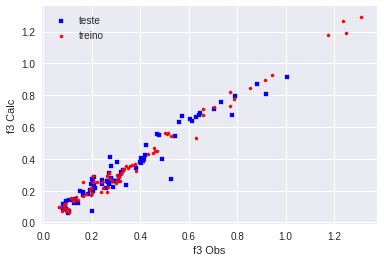

In [20]:
# expressa os dois dados em figura
fig = plt.figure()
ax1 = fig.add_subplot(111)

ax1.scatter(resist_obs_test,resist_calc_test, s=10, c='b', marker="s", label='teste')
ax1.scatter(resist_obs_train,resist_calc_train, s=10, c='r', marker="o", label='treino')
plt.legend(loc='upper left')
plt.ylabel('f3 Calc')
plt.xlabel('f3 Obs')
plt.show()

In [21]:
# cálculo de MSE e R² para o teste
mse=mean_squared_error(resist_obs_test,resist_calc_test)
print("MSE teste=",mse)
R2=r2_score(resist_obs_test,resist_calc_test)
print("R^2 teste=",R2)

MSE teste= 0.0030851770590833295
R^2 teste= 0.9323903677314254


In [22]:
# cálculo de MSE e R² para o treino
mse=mean_squared_error(resist_obs_train,resist_calc_train)
print("MSE treino=",mse)
R2=r2_score(resist_obs_train,resist_calc_train)
print("R^2 treino=",R2)

MSE treino= 0.0011185531402896766
R^2 treino= 0.9868160256668429
